# Personal Loan Prediction Model EDA

In [ ]:
# import libraries required for data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [3]:
#load the data from its location

df = pd.read_excel('C:\\Loan_data.xlsx','Data')

In [4]:
df.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [5]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### ID and ZIP code are nominal variables, they are generaaly used for ordering data and do not have any impact on the quantitaive evaluation made on the data. So they can be used as string types.

In [6]:
df[['ID','ZIP Code']] = df[['ID','ZIPCode']].astype('str')

In [7]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.34,11.46,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.10,11.47,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.77,46.03,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93152.50,2121.85,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.40,1.15,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.94,1.75,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.88,0.84,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.50,101.71,0.0,0.0,0.0,101.0,635.0
PersonalLoan,5000.0,0.10,0.29,0.0,0.0,0.0,0.0,1.0
SecuritiesAccount,5000.0,0.10,0.31,0.0,0.0,0.0,0.0,1.0


### As we can see from the describe funcrtion, experience has negative values, we must understand it's association with any other quantitatyive value to make any changes to the neg values. 

In [8]:
df[df['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

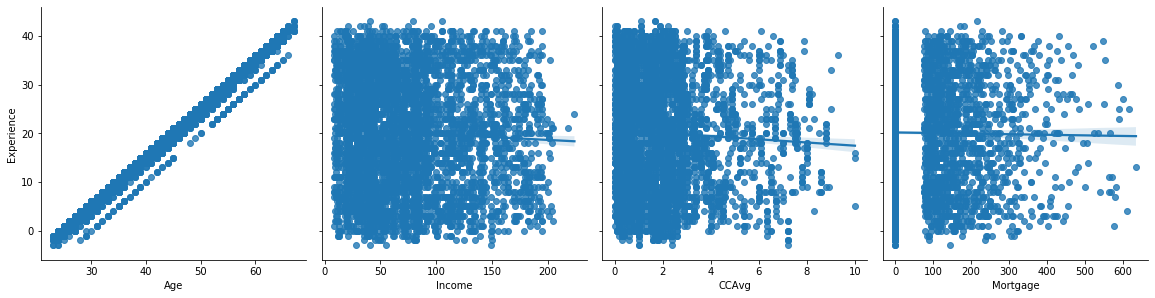

In [9]:
ncol = ['Age', 'Income','CCAvg', 'Mortgage']
grid = sns.PairGrid(df, y_vars = 'Experience', x_vars = ncol, height = 4)
grid.map(sns.regplot);

### Age is showing very strong association with the experience variable, we must use it to make changes in experience.

In [10]:
#Checking age groups with negative values.

df[df['Experience'] < 0]['Age'].value_counts()

25    18
24    17
23    12
29     3
28     1
26     1
Name: Age, dtype: int64

### Since very few values are negative in each group, we can fill it with corresponding positive age mean of same age group

In [11]:
# Take age groups in a list

grp = df[df['Experience'] < 0]['Age'].unique().tolist()

In [12]:
# Take indexes of all negative experience values

indexes = df[df['Experience'] < 0].index.tolist()

In [13]:
# A small code which uses both lists to replace negatives with means

for i in indexes:
    for x in grp:
        df.loc[i,'Experience'] = df[(df.Age == x) & (df.Experience > 0)].Experience.mean()

In [14]:
#Checking if the values have been adjusted.

df[df['Experience']<0]['Experience'].count()

0

### Distribution of individual variables 

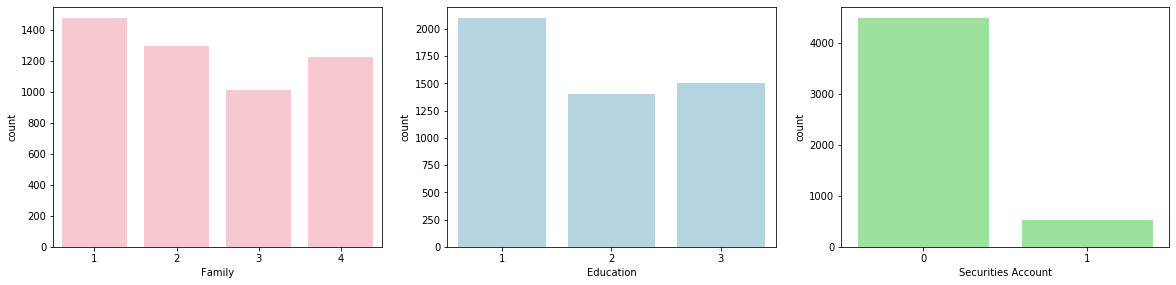

In [15]:
#Plots to see the distribution of the Categorical features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.countplot(df["Family"], color='pink')
plt.xlabel('Family')

plt.subplot(3,3,2)
sns.countplot(df["Education"], color='lightblue')
plt.xlabel('Education')

plt.subplot(3,3,3)
sns.countplot(df["SecuritiesAccount"], color='lightgreen')
plt.xlabel('Securities Account')

plt.show()

#### Most of the customers have a family size less than or equal to two

#### More than 60% of the customers have either have Graduate level education or more(1:Undergrad; 2: Graduate; 3: Advanced/Professional)

#### More than 90% of the customers do not have securities account

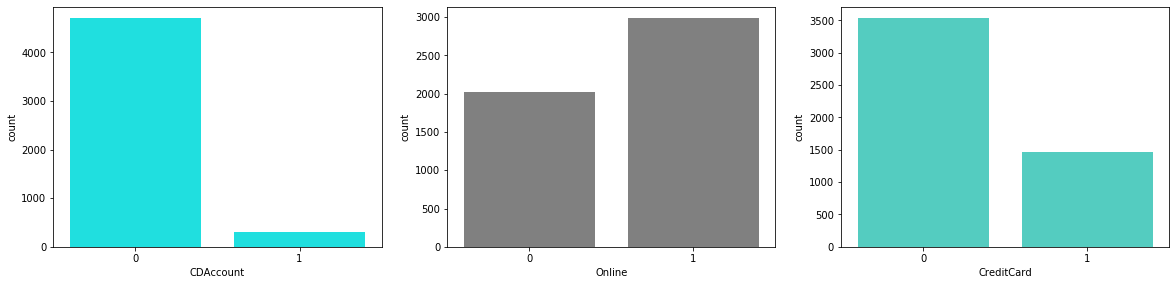

In [16]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.countplot(df["CDAccount"], color='cyan')
plt.xlabel('CDAccount')

plt.subplot(3,3,2)
sns.countplot(df["Online"], color='grey')
plt.xlabel('Online')

plt.subplot(3,3,3)
sns.countplot(df["CreditCard"], color='turquoise')
plt.xlabel('CreditCard')

plt.show()

#### More than 90% of the customers do not have CD account

#### More than 50% of the customers use online services

#### Nearly 30% of the customers hold a credit card

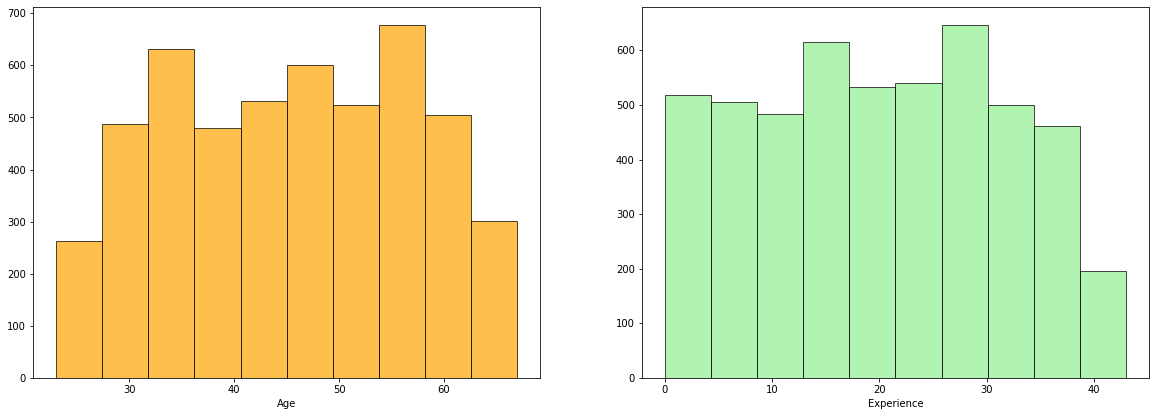

In [17]:
#Plots to see the distribution of the Continuos features AGE AND EXPERIENCE individually

plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
plt.hist(df["Age"], color='orange', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Age')

plt.subplot(2,2,2)
plt.hist(df["Experience"], color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Experience')
plt.show()

#### Majority of the customers are in the age groups 30's and 50's

#### 15 to 30 years is the age range in between which most customers lie.

Text(0.5, 0, 'Mortgage')

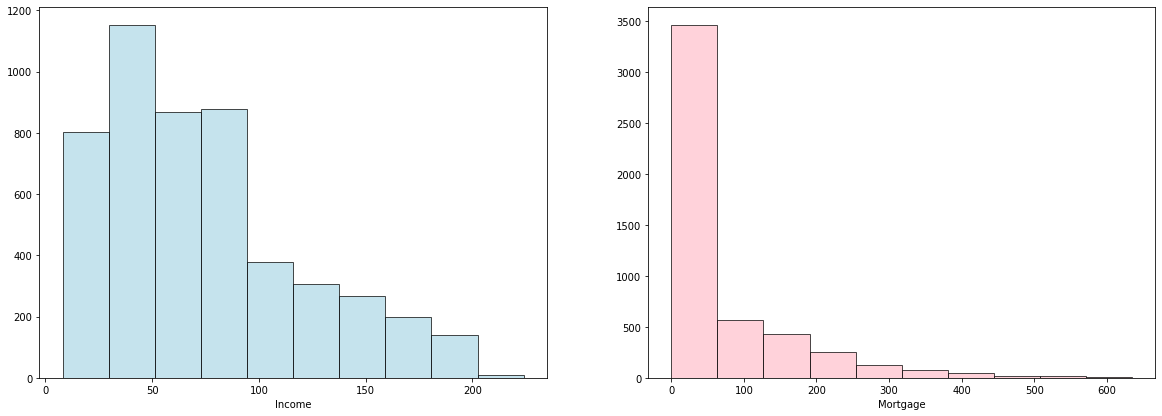

In [18]:
#Plots to see the distribution of the Continuos features INCOME AND MORTGAGE individually


plt.figure(figsize= (20,15))
plt.subplot(2,2,3)
plt.hist(df["Income"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Income')

plt.subplot(2,2,4)
plt.hist(df["Mortgage"], color='Pink', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Mortgage')



#### Majority of the customers have an income of around 25 to 50 thousand USD

#### Most of the customers have the mortgage valued lesser than 100 thousand USD

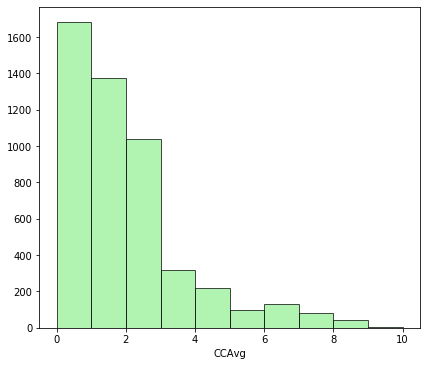

In [19]:
plt.figure(figsize= (15,13))
plt.subplot(2,2,1)
plt.hist(df["CCAvg"], color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel('CCAvg')
plt.show()

#### Nearly 30% of the customers have less than 1000 USD Credit card Spending

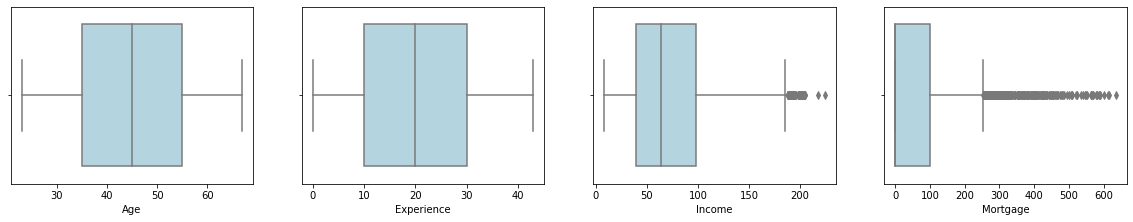

In [20]:
#Understanding the averages

plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(x= df["Age"], color='lightblue')

plt.subplot(4,4,2)
sns.boxplot(x= df["Experience"], color='lightblue')

plt.subplot(4,4,3)
sns.boxplot(x= df["Income"], color='lightblue')

plt.subplot(4,4,4)
sns.boxplot(x= df["Mortgage"], color='lightblue')

plt.show()

#### Average age group of customers is 45 years

#### Average Experience of customers is 20 years

#### Both Income and Mortage are right skewed, meaning it will remain in the lower bounds

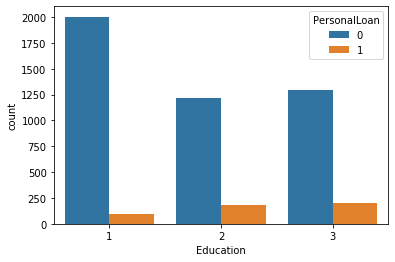

In [21]:
sns.countplot(x = 'Education', hue = 'PersonalLoan', data = df)

#### The number of customers with higher education are buying Personal Loan compared to other groups.

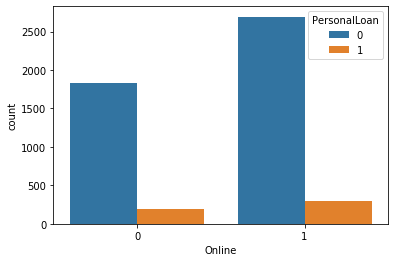

In [22]:
sns.countplot(x = 'Online', hue = 'PersonalLoan', data = df)

#### Customers who use online services are more likely to take loans compared to the rest.

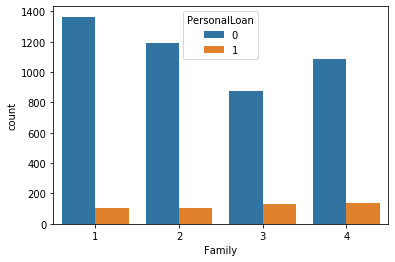

In [23]:
sns.countplot(x = 'Family', hue = 'PersonalLoan', data = df)

#### Family with size more than 2 are more intrested in personal loans

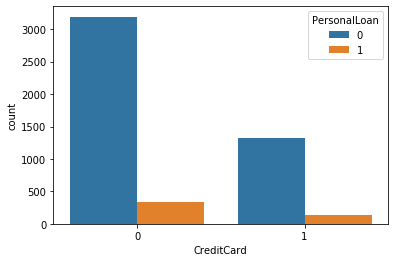

In [24]:
sns.countplot(x = 'CreditCard', hue = 'PersonalLoan', data = df)

#### People who were not using the Credit Card are seen tho have opted more for personal loan

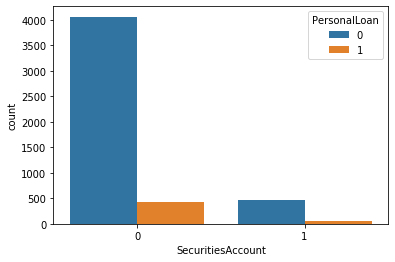

In [25]:
sns.countplot(x = 'SecuritiesAccount', hue = 'PersonalLoan', data = df)

#### People who did not have Securities Acoount have opted more for loan

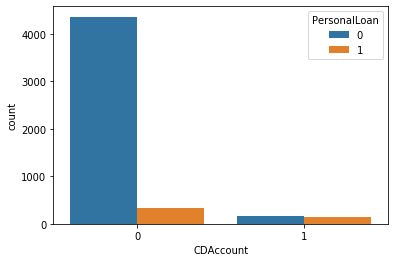

In [26]:
sns.countplot(x = 'CDAccount', hue = 'PersonalLoan', data = df)

#### People with no CD Account are more channeled towards Personal Loan

In [27]:
#df[df['Age'] <= 40].groupby(['Age'])['PersonalLoan'].sum()
###########df[df["CreditCard"] == 1].groupby("PersonalLoan").count()

# Relationship Analysis

In [28]:
rel = df.corr()

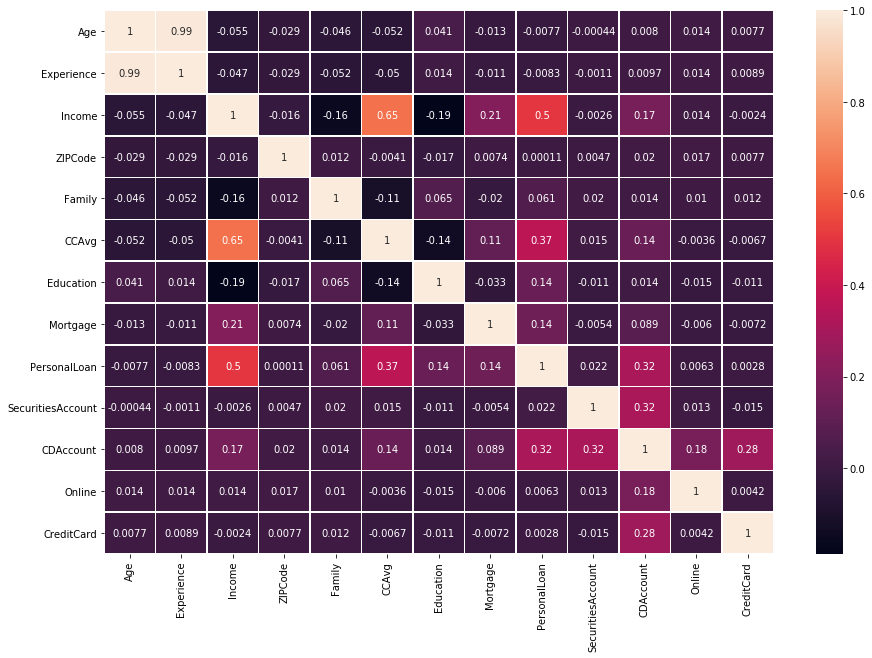

In [29]:
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(rel, xticklabels = rel.columns, yticklabels = rel.columns, annot = True, linewidths=.5, ax=ax)


#### Correlation of Zip code,Age, Experience very close to zero

#### Features like Income, Credit Card Spending(CCAvg) and CDAccount have the highest correlation

#### Features like Family, Education and Mortgage has considerable correlation

#### Age and Experience have high correlation with each other.

In [30]:
#df[df["Mortgage"] == 0].groupby("PersonalLoan").count()

## Let's try to understand the influence of quantitative values on Personal loan

In [31]:
df2 = df[['PersonalLoan', 'Age', 'Income', 'CCAvg', 'Mortgage']].copy()

In [32]:
df2.corr()

,PersonalLoan,Age,Income,CCAvg,Mortgage
PersonalLoan,1.000000,-0.007726,0.502462,0.366891,0.142095
Age,-0.007726,1.000000,-0.055269,-0.052030,-0.012539
Income,0.502462,-0.055269,1.000000,0.645993,0.206806
CCAvg,0.366891,-0.052030,0.645993,1.000000,0.109909
Mortgage,0.142095,-0.012539,0.206806,0.109909,1.000000


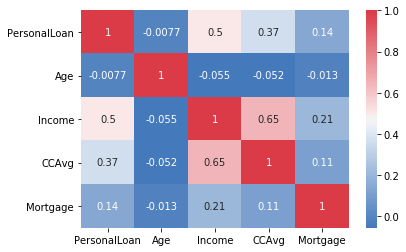

In [33]:
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(df2.corr(), cmap = cmap, annot = True);

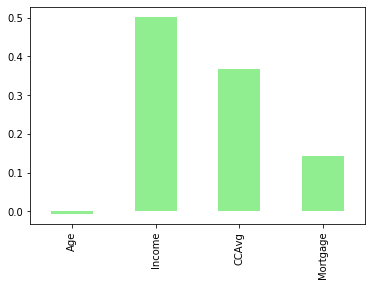

In [34]:

df2.corr()['PersonalLoan'][1:].plot.bar(color = "lightgreen");

#### We can see age and Mortgage has low association with Personal Loan

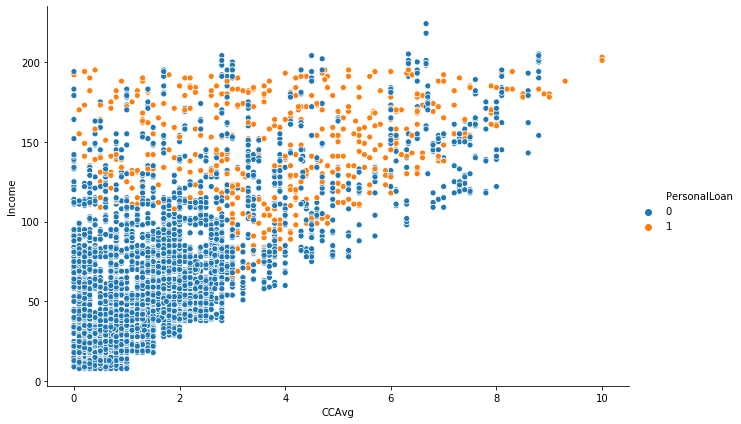

In [35]:
sns.relplot(x = 'CCAvg', y = 'Income', hue = 'PersonalLoan', data = df, height=6, aspect=1.5)

#### Customers with the spending less than than 2000 USD on CREDIT CARD every month and INCOME over 100K USD did not opt for loan 

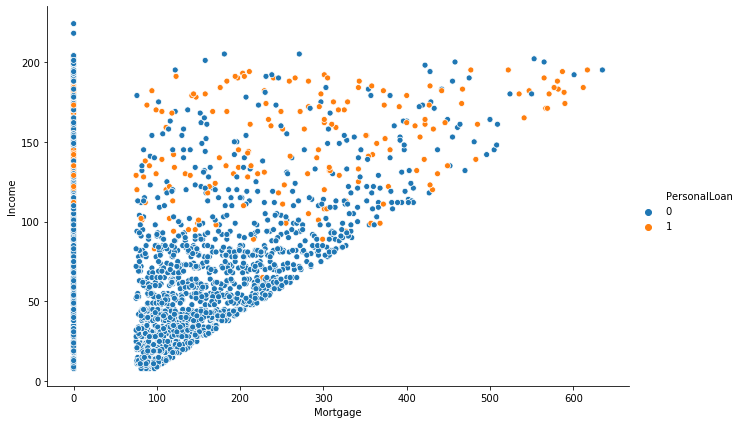

In [36]:
sns.relplot(y = 'Income', x = 'Mortgage', hue = 'PersonalLoan', data = df, height=6, aspect=1.5)

#### Most people who have not brought loan and having income lesser than 100 thousand USD and have Mortgage less than 300K as well (Safe to target these customers)

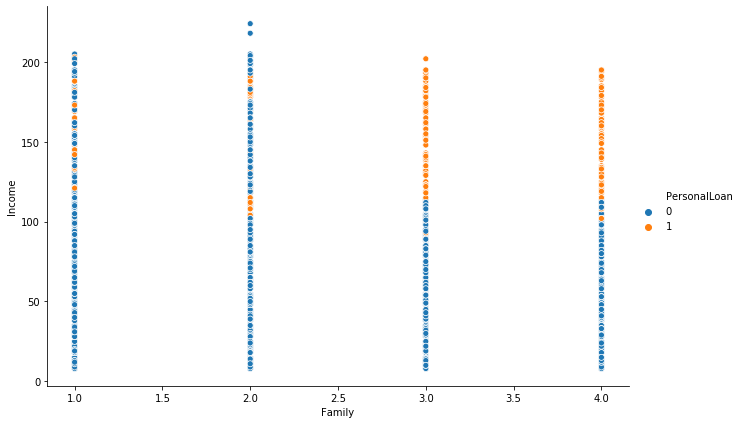

In [37]:
sns.relplot(y = 'Income', x = 'Family', hue = 'PersonalLoan', data = df, height=6, aspect=1.5)

#### Families with size 3 and above are more interested in Personal loan (Can target customers with family size 2 and income above 100k USD)

#### Everyone with income a bit more than 100k USD and family size 3 or 4 has brought the loans 

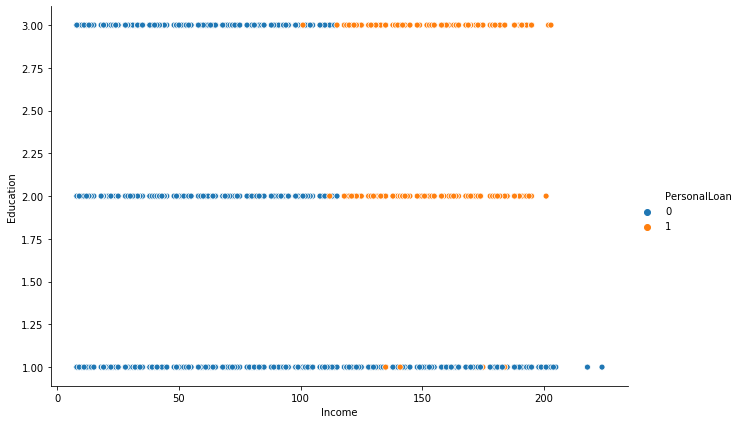

In [39]:
sns.relplot(x = 'Income', y = 'Education', hue = 'PersonalLoan', data = df, height=6, aspect=1.5)

#### Everyone with education level 2 or above and income over 100K USD has brought the loan

# Observations from the dataset

In [40]:
#Average age group of customers is 45yrs

#Average Experience of customers is 20

#Most of the customers are of age group 55

#75% of the family members of the customer are 3

#75% of the customers are using Online banking facility.

#Majority of the Customers are with experience between 15-30yrs

#Outliers are present in Mortage and Income feature

#Income and Mortage are right skewed

#CCAVG, Mortgage, Personal Loan, Securities Account, CD Account are highly skewed

#Mortage is extremly positive squared

In [41]:
#The number of customers with higher education are buying Personal Loan compared to other groups.

#Customers who operates online are more tend to take loans compared to non online users.

#Family with size more than 2 are more intrested in personal loans

#Customers with no credit card are more intrested to buy personal loans

#Customers with no security accounts are more intrested in buying personal loans

#There is a higher correlation in Age and Experience feature so we can drop one of them.

#Correlation coefficient of ID and target variable Personal Loan is negative and close to zero so we can drop the variable.

#Correlation coefficient of Age and Experience are negative and close to zero so we can drop these variables as well

#Correlation coefficient of Zip code variable is also close to zero so we can drop this variable